<a href="https://colab.research.google.com/github/dennkitotaichi/CE_PLUS/blob/patch-1/light_GBM_sono11_dennki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving testTotal2019.csv to testTotal2019.csv


     Unnamed: 0  ...  Average cloud volume (10 pct)
0      2016/9/1  ...                            4.3
1      2016/9/2  ...                            9.5
2      2016/9/3  ...                           10.0
3      2016/9/4  ...                           10.0
4      2016/9/5  ...                            8.3
...         ...  ...                            ...
1090  2019/8/27  ...                            3.8
1091  2019/8/28  ...                           10.0
1092  2019/8/29  ...                           10.0
1093  2019/8/30  ...                            7.8
1094  2019/8/31  ...                            6.3

[1095 rows x 24 columns]
     Unnamed: 0  ...  Average cloud volume (10 pct)
0      2016/9/1  ...                            4.3
1      2016/9/2  ...                            9.5
2      2016/9/3  ...                           10.0
3      2016/9/4  ...                           10.0
4      2016/9/5  ...                            8.3
...         ...  ...                  

Using TensorFlow backend.


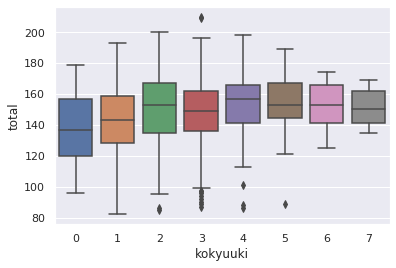

In [2]:
import pandas as pd

dt = pd.read_csv('testTotal2019.csv')
print(dt)
df = pd.DataFrame(dt)
print(df)
print(df.columns)
print(df.columns[[0]])
print(df.drop(df.columns[[0]], axis=1))
dtt=df.drop(df.columns[[0]], axis=1)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set()
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(x="kokyuuki", y="total", data=dtt)

回帰係数
[0.15418931]
切片 (誤差)
1.489564765071456
決定係数
0.08856467850020489
------------------------------------------------------------
                             Name  Coefficients
1                             man     -1.380895
2                           woman     -1.366668
5                        kaitouOP     -0.298966
7                       kaifukuOP     -0.186088
10                         elseOP     -0.120224
12           Lowest temperature ?     -0.116004
8                        honenoOP     -0.059255
13          Maximum temperature ?     -0.021475
17            Total snowfall (cm)     -0.008652
16              Deepest Snow (cm)     -0.005339
20   Average local pressure (hPa)      0.001580
14       Total precipitation (mm)      0.002979
9                     fukukuukyou      0.008026
19  Minimum relative humidity (%)      0.008608
3                      sinndennzu      0.009397
21  Average cloud volume (10 pct)      0.011035
15         Daylight Hours (Hours)      0.014432
18    

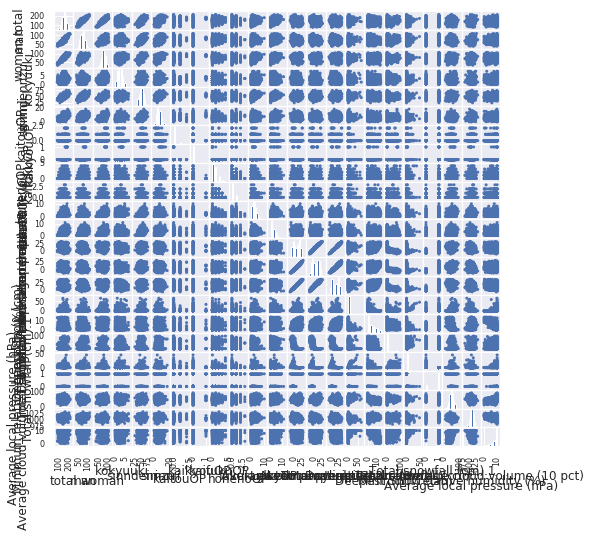

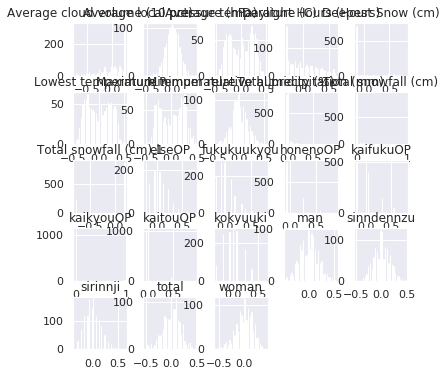

[ 0.13189212  0.10064212  0.06157962 ... -0.19623288 -0.20404538
 -0.32123288]
                             Name  Coefficients
18          Total snowfall (cm).1      0.015505
20   Average local pressure (hPa)      0.076616
9                     fukukuukyou      0.080256
21  Average cloud volume (10 pct)      0.110350
6                       kaikyouOP      0.147676
8                        honenoOP      0.177765
14       Total precipitation (mm)      0.201061
15         Daylight Hours (Hours)      0.203496
17            Total snowfall (cm)      0.380674
3                      sinndennzu      0.479259
16              Deepest Snow (cm)      0.512575
5                        kaitouOP      0.597932
19  Minimum relative humidity (%)      0.723088
7                       kaifukuOP      0.744351
13          Maximum temperature ?      0.966375
10                         elseOP      1.322462
4                        sirinnji      2.314692
11        Average temperature (C)      3.559278
12       

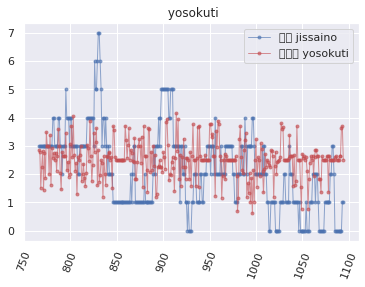

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import r2_score

import random

from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=1, figsize=(8, 8), diagonal='hist', range_padding=0.5)

# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "density (濃度)" を利用
X = df.loc[:, ['sirinnji']].values
 
# 目的変数に "target" を利用
Y = df['kokyuuki'].values
# 予測モデルを作成
clf.fit(X, Y)
 
# 回帰係数
print("回帰係数")
print(clf.coef_)
 
# 切片 (誤差)
print("切片 (誤差)")
print(clf.intercept_)
 
# 決定係数
print("決定係数")
print(clf.score(X, Y))

print("------------------------------------------------------------")

# 説明変数に "kokyuuki(kokyuukiスコア以外すべて)" を利用
wine_except_quality = dtt.drop('kokyuuki', axis=1)
X = wine_except_quality.values
 
# 目的変数に "kokyuuki" を利用
Y = dtt['kokyuuki'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)


print("------------------------------------------------------------")

 
# データフレームの各列を正規化
wine2 = dtt.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()
 
wine2.hist(bins=30,rwidth=0.2 ,figsize=(6,6), color = 'orange') ;
plt.tight_layout()
plt.show()


print(wine2['total'].values)

# 説明変数に "quality (kokyuukiスコア以外すべて)" を利用
wine2_except_quality = wine2.drop('kokyuuki', axis=1)
X = wine2_except_quality.values
 
# 目的変数に "quality (品質スコア)" を利用
Y = df['kokyuuki'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine2_except_quality.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)


print("------------------------------------------------------------")



sirinnji = df['total'].values
sirinnji2 = preprocessing.minmax_scale(sirinnji)
print(sirinnji2)

kaifukuOP = df['woman'].values
kaifukuOP2 = preprocessing.minmax_scale(kaifukuOP)
print(kaifukuOP2)

youso3 = df['man'].values
youso3seikika = preprocessing.minmax_scale(kaifukuOP)
print(youso3seikika)

sika=np.array([sirinnji2,kaifukuOP2,youso3])
si=sika.T
X=si

print(X)
print("X.shape")
print(X.shape)



targetk = df['kokyuuki'].values
siY=targetk.T
Y=siY

print("Y",  Y)


print(Y.shape)

# 訓練用のデータと、テスト用のデータに分ける
N_train = int(len(df) * 0.70)
N_test = len(df) - N_train
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=N_test, shuffle = False) 



print("X_train.shape")
print(X_train.shape)
print("Y_train.shape")
print(y_train.shape)
print("X_test")
print(X_test)
print("X_test.shape")
print(X_test.shape)
print("Y_test.shape")
print(y_test.shape)

from sklearn import svm  
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.metrics import r2_score


lgb_params = {
   'reg_lambda': 0.0,
   'reg_alpha': 0.0,
   'num_leaves': 600,
   'n_estimators': 30000,
   'min_data_leaf': 50,
   'learning_rate': 0.025,
   'bagging_fraction': 0.8,
            }

lgb_model = lgb.LGBMRegressor(**lgb_params)
lgb_model = lgb.LGBMRegressor()
# 上記のパラメータでモデルを学習する

# 学習用のデータと結果を学習する,fit(X_train:学習データ, learn_label:答えデータ)
lgb_model.fit(X_train, y_train)
# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(X_test)

lgb.LGBMClassifier()
#「LGBMClassifier」のクラスを呼び出して、ハイパーパラメータの初期値を確認
print("Y_pred")
print(Y_pred)

# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(X_test)

# テスト結果を評価する,accuracy_score()
print("予測対象：", y_test, ", 予測結果→", Y_pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(y_test, Y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test,Y_pred)))

## test_r2_score計算
test_r2_score = r2_score(y_test,Y_pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()


[0.6484375 0.6171875 0.578125  ... 0.3203125 0.3125    0.1953125]
[0.56756757 0.55405405 0.58108108 ... 0.35135135 0.35135135 0.27027027]
[0.56756757 0.55405405 0.58108108 ... 0.35135135 0.35135135 0.27027027]
X.shape
(1095, 3)
(1095,)
# 5等分の交差検証
[0.21917808 0.2283105  0.26484018 0.24657534 0.25114155]
---------------------------------------------------------
KNC 0.20487012987012987
DTC 0.16563568010936433
SVM 0.21006493506493512
---------------------------------------------------------
Best score: 0.24620060790273557
Best parameters: {'gamma': 0.001, 'C': 1}
---------------------------------------------------------
予測対象： [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 4 4 3 3 2 3 3 3 5 4 4 4 3 4 4 3
 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 3 6 5 5 6 7 7 6 5 3 4 4 3 4 3
 2 3 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 3 3 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 2 3 2 3 3 3 4 3 4 5 5 5 5 5 5 5 5 4 4 5 5 5 3 3 3
 3 3 3 3 1 3 3 2 2 3 1 1 0 1 0 0 0 1 1 2 2 2 1 1 1 1 2 2 1 1 2 2 2 3 3

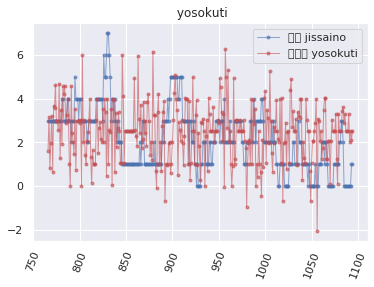

---------------------------------------------------------
【SVC】
 Train Accuracy: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.00      0.00      0.00       157
           2       0.25      1.00      0.40       190
           3       0.00      0.00      0.00       171
           4       0.00      0.00      0.00       138
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         3

    accuracy                           0.25       766
   macro avg       0.03      0.12      0.05       766
weighted avg       0.06      0.25      0.10       766

           
 Test Accuracy:  
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.00      0.00      0.00        89
           2       0.20      1.00      0.34        67
           3       0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bagging_fraction=0.1, learning_rate=0.001, min_data_leaf=10, n_estimators=100, total=   0.0s
[CV] bagging_fraction=0.1, learning_rate=0.001, min_data_leaf=10, n_estimators=100 
[CV]  bagging_fraction=0.1, learning_rate=0.001, min_data_leaf=10, n_estimators=100, total=   0.0s
[CV] bagging_fraction=0.1, learning_rate=0.001, min_data_leaf=10, n_estimators=100 
[CV]  bagging_fraction=0.1, learning_rate=0.001, min_data_leaf=10, n_estimators=100, total=   0.0s
[CV] bagging_fraction=0.1, learning_rate=0.001, min_data_leaf=10, n_estimators=100 
[CV]  bagging_fraction=0.1, learning_rate=0.001, min_data_leaf=10, n_estimators=100, total=   0.0s
[CV] bagging_fraction=0.1, learning_rate=0.001, min_data_leaf=10, n_estimators=1000 
[CV]  bagging_fraction=0.1, learning_rate=0.001, min_data_leaf=10, n_estimators=1000, total=   0.3s
[CV] bagging_fraction=0.1, learning_rate=0.001, min_data_leaf=10, n_estimators=1000 
[CV]  bagging_fraction=0.1, learning_rate=0.001, min_data_leaf=10, n_estimators=10

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed: 12.2min finished


In [17]:
sirinnji = df['total'].values
sirinnji2 = preprocessing.minmax_scale(sirinnji)
print(sirinnji2)

kaifukuOP = df['woman'].values
kaifukuOP2 = preprocessing.minmax_scale(kaifukuOP)
print(kaifukuOP2)

youso3 = df['man'].values
youso3seikika = preprocessing.minmax_scale(kaifukuOP)
print(youso3seikika)

sika=np.array([sirinnji2,kaifukuOP2,youso3])
si=sika.T
X=si

print("X.shape")
print(X.shape)

targetk = df['kokyuuki'].values
siY=targetk.T
Y=siY


print(Y.shape)

# 訓練用のデータと、テスト用のデータに分ける
N_train = int(len(df) * 0.70)
N_test = len(df) - N_train
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=N_test, shuffle = False) 

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

print("# 5等分の交差検証")
print(cross_val_score(clf, X, Y, cv=5))

print("---------------------------------------------------------")

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#機械学習モデルをリストに格納
models = []
models.append(("KNC",KNeighborsClassifier()))
models.append(("DTC",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

#複数のclassifier の適用
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=42)
    result = cross_val_score(model,X_train,y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(result)

#適用したclassifierのスコア表示
for i in range(len(names)):
    print(names[i],results[i].mean())

print("---------------------------------------------------------")


param_list = [0.001, 0.01, 0.1, 1, 10, 100]

best_score = 0
best_parameters = {}

for gamma in param_list:
    for C in param_list:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        # 最も良いスコアのパラメータとスコアを更新
        if score > best_score:
            best_score = score
            best_parameters = {'gamma' : gamma, 'C' : C}

print('Best score: {}'.format(best_score))
print('Best parameters: {}'.format(best_parameters))



print("---------------------------------------------------------")


from sklearn import svm  
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.metrics import r2_score


lgb_params = {
   'reg_lambda': 0.0,
   'reg_alpha': 0.0,
   'num_leaves': 600,
   'n_estimators': 30000,
   'min_data_leaf': 50,
   'learning_rate': 0.025,
   'bagging_fraction': 0.8,
            }

lgb_model = lgb.LGBMRegressor(**lgb_params)

# 上記のパラメータでモデルを学習する

# 学習用のデータと結果を学習する,fit(X_train:学習データ, learn_label:答えデータ)
lgb_model.fit(X_train, y_train)
# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(X_test)


lgb.LGBMClassifier()
#「LGBMClassifier」のクラスを呼び出して、ハイパーパラメータの初期値を確認

# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(X_test)

# テスト結果を評価する,accuracy_score()
print("予測対象：", y_test, ", 予測結果→", Y_pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(y_test, Y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test,Y_pred)))

## test_r2_score計算
test_r2_score = r2_score(y_test,Y_pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()

print("---------------------------------------------------------")

from sklearn.metrics import classification_report

def model_check(lgb_model):
     model.fit(X_train,y_train)
     y_train_pred = classification_report(y_train,model.predict(X_train))
     y_test_pred  = classification_report(y_test,model.predict(X_test))

     print("""【{model_name}】\n Train Accuracy: \n{train}
           \n Test Accuracy:  \n{test}""".format(model_name=model.__class__.__name__, train=y_train_pred, test=y_test_pred))

print(model_check(RandomForestClassifier()))

print("---------------------------------------------------------")

 #Grid searcharn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
 # use a full grid over all parameters

def lgb_params2():
   ret = {
        # 0.0以上1.0以下を3分割したarrayを作る
   #'reg_lambda': np.linspace(0.0, 1.0, 3),
   #'reg_alpha': np.linspace(0.0, 1.0, 3),
   'n_estimators':[10,50,100,1000,10000],
   'min_data_leaf': [10,50,100],
   'learning_rate': [0.001,0.01,0.025,0.05],
   'bagging_fraction':[0.1,0.5,0.8,1.0],
   }
   return ret

gscv = GridSearchCV(lgb.LGBMRegressor(), lgb_params2(), cv=4, verbose=2)
gscv.fit(X_train, y_train)

gs_result = pd.DataFrame.from_dict(gscv.cv_results_)
print('gs_result')
print(gs_result)


In [18]:
gs_result = pd.DataFrame.from_dict(gscv.cv_results_)
print('gs_result')
print(gs_result)

print(gs_result.mean())

gs_result.to_csv('gs_result2.csv')
  # 最高性能のモデルを取得し、テストデータを分類
best = gscv.best_estimator_
pred = best.predict(X_test)

  # 混同行列を出力
print(pred)

gs_result
     mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0         0.007190      0.002761  ...        0.136121                1
1         0.016666      0.002032  ...        0.133611               13
2         0.042017      0.006393  ...        0.130536               25
3         0.323272      0.010737  ...        0.113812               85
4         3.346114      0.036899  ...        0.303533              169
..             ...           ...  ...             ...              ...
235       0.005137      0.000434  ...        0.110442               73
236       0.014824      0.000377  ...        0.193931              133
237       0.029515      0.001887  ...        0.224620              145
238       0.327119      0.014044  ...        0.419079              193
239       3.275887      0.039470  ...        0.527586              229

[240 rows x 16 columns]
mean_fit_time                0.727937
std_fit_time                 0.009375
mean_score_time              0.029824

In [0]:
# 交差検証
from sklearn.model_selection import cross_val_score
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import  DecisionTreeClassifier
# k-NN
from sklearn.neighbors import  KNeighborsClassifier
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

df.describe()

models = [LogisticRegression(),LinearSVC(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors = 6),RandomForestClassifier()]
scores = {}
for model in models:
    scores[str(model).split('(')[0]] = cross_val_score(model,X_train,y_train, scoring = "accuracy")
df = pd.DataFrame(scores)

print(df)
print(df.mean())




from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#機械学習モデルをリストに格納
models = []
models.append(("KNC",KNeighborsClassifier()))
models.append(("DTC",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

#複数のclassifier の適用
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=42)
    result = cross_val_score(model,X_train,y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(result)

#適用したclassifierのスコア表示
for i in range(len(names)):
    print(names[i],results[i].mean())

   LogisticRegression  LinearSVC  ...  KNeighborsClassifier  RandomForestClassifier
0            0.232558   0.244186  ...              0.217054                0.193798
1            0.239216   0.247059  ...              0.207843                0.231373
2            0.233202   0.181818  ...              0.185771                0.169960

[3 rows x 5 columns]
LogisticRegression        0.234992
LinearSVC                 0.224354
DecisionTreeClassifier    0.166994
KNeighborsClassifier      0.203556
RandomForestClassifier    0.198377
dtype: float64
KNC 0.20487012987012987
DTC 0.1630382775119617
SVM 0.17477785372522217
